# Ensemble de Julia

&nbsp;

<center>**Loic Gouarin**</center>
<center>11 juillet 2017</center>

&nbsp;


Soit $z_0$ un nombre complexe que l'on associe aux points du plan. Si un point a pour coordonnées $(x, y)$ alors $z_0=x + iy$ (où $i^2=-1$). Soit $c$ un autre nombre complexe constant. On définit une suite $z_n$ par la relation de récurrence

$$
z_{n+1} = z_n^2 + c.
$$

Alors l'ensemble de Julia est l'ensemble des points $z_0$ dont la suite des itérés reste bornée.

## Définition des paramètres pour nos tests

In [1]:
import numpy as np
# taille de la grille
nx, ny = 512, 512
#nx, ny = 1024, 1024
# limites indiquant quand la suite diverge
lim, maxit = 400, 2000
# valeurs à visualiser 
vmin, vmax = 0, 200
# définition de la grille
x = np.linspace(-1.6, 1.6, nx)
y = np.linspace(-1.6, 1.6, ny)
c = -0.772691322542185 + 0.124281466072787j
print(2 + 1j*4, abs(1j))

(2+4j) 1.0


## Exercices

#### Exercice 1
Ecrivez une première version en utilisant du Python pur. La structure de la fonction est la suivante

In [2]:
def juliasetPurePython(x, y, c, lim, maxit):
    """ 
    Renvoie l'ensemble de Julia
    
    Paramètres
    ----------
    
    x: coordonnées des parties réelles regardées
    y: coordonnées des parties imaginaires regardées
    c: nombre complexe figurant dans z^2 + c
    lim: limite du module complexe à partir de laquelle la suite est dite divergente
    maxit: nombre d'itérés maximal
    
    """

    julia = np.empty((y.size, x.size))
    
    for j in range(y.size):
        for i in range(x.size):
            z = x[i] + 1j*y[j]
            ite = 0
            while abs(z) < lim and ite < maxit:
                z = z**2 + c
                ite += 1
            julia[j, i] = ite
            
    return julia

In [3]:
julia = juliasetPurePython(x, y, c, lim, maxit)

#### Exercice 2

Représentez la solution à l'aide de **matplotlib** en utilisant **imshow** et la colormap **Greys**.

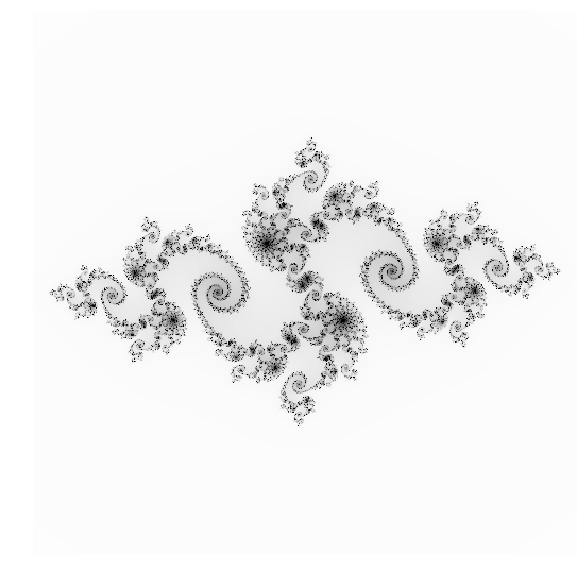

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(10,10))
plt.imshow(julia, cmap=cm.Greys, vmin=vmin, vmax=vmax)
plt.axis('off')
plt.show()

#### Exercice 3
Ecrivez la version NumPy.

**Ingrédients**

- np.newaxis
- np.all
- np.abs
- np.logical_and

In [5]:
def juliasetNumpy(x, y, c, lim, maxit):
    """ 
    Renvoie l'ensemble de Julia
    
    Paramètres
    ----------
    x: coordonnées des parties réelles regardées
    y: coordonnées des parties imaginaires regardées
    c: nombre complexe figurant dans z^2 + c
    lim: limite du module complexe à partir de laquelle la suite est dite divergente
    maxit: nombre d'itérés maximal
    
    """

    julia = np.zeros((y.size, x.size))
    
    zx = x[np.newaxis, :]
    zy = y[:, np.newaxis]
    
    z = zx + 1j*zy
    
    ite = 0
    while not np.all(julia) and ite < maxit:
        z = z**2 + c
        mask = (np.abs(z) >= lim) & np.logical_not(julia)
        ite += 1
        julia[mask] = ite
        
    return julia

#### Exercice 4

Comparez les temps de calcul de chaque version en utilisant **%timeit**.

In [6]:
%timeit juliasetPurePython(x, y, c, lim, maxit)

14.3 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit juliasetNumpy(x, y, c, lim, maxit)

/home/loic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
/home/loic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in square
/home/loic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in absolute
/home/loic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater_equal


6.1 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../../style/custom.css").read()
    return HTML(styles)
css_styling()